# Problem Statement
You have been hired as a consultant to a major Automotive Manufacturer and you have been tasked to develop a model to predict the impact of increasing the vehicle horsepower (HP) on fuel economy (Mileage Per Gallon (MPG)). 
You gathered the data:

Data set:

- Independant variable X: Vehicle Horse Power ,
- Dependant variable Y: Mileage Per Gallon (MPG)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fuelEcon = pd.read_csv('FuelEconomy.csv')

In [3]:
fuelEcon

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739
...,...,...
95,162.810542,27.418661
96,266.869640,15.989945
97,243.831211,19.253375
98,140.959803,29.515593


In [4]:
fuelEcon.describe()

,Horse Power,Fuel Economy (MPG)
count,100.000000,100.000000
mean,213.676190,23.178501
std,62.061726,4.701666
min,50.000000,10.000000
25%,174.996514,20.439516
50%,218.928402,23.143192
75%,251.706476,26.089933
max,350.000000,35.000000


In [6]:
fuelEcon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Horse Power         100 non-null    float64
 1   Fuel Economy (MPG)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [7]:
fuelEcon.head(5)

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739


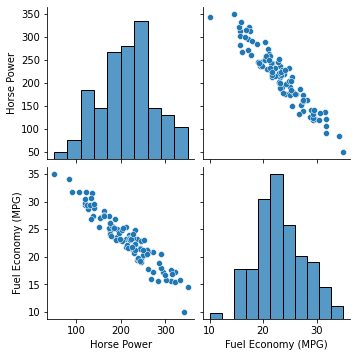

In [8]:
sns.pairplot(fuelEcon)

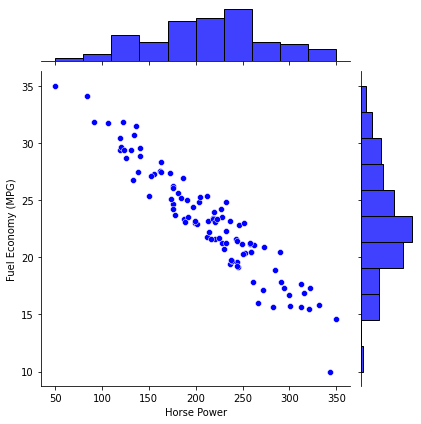

In [10]:
sns.jointplot(x='Horse Power',y='Fuel Economy (MPG)', data = fuelEcon , color = 'blue')

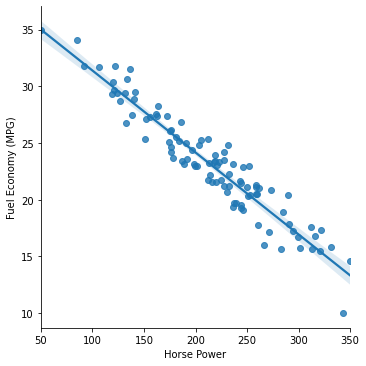

In [12]:
sns.lmplot(x='Horse Power',y='Fuel Economy (MPG)', data = fuelEcon )

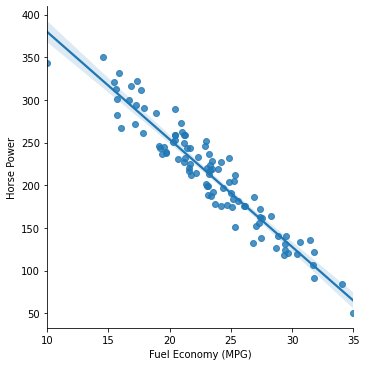

In [13]:
sns.lmplot(y='Horse Power',x='Fuel Economy (MPG)', data = fuelEcon )

In [14]:
X = fuelEcon[['Horse Power']]
y= fuelEcon[['Fuel Economy (MPG)']]

In [15]:
X

,Horse Power
0,118.770799
1,176.326567
2,219.262465
3,187.310009
4,218.594340
...,...
95,162.810542
96,266.869640
97,243.831211
98,140.959803


In [16]:
y

,Fuel Economy (MPG)
0,29.344195
1,24.695934
2,23.952010
3,23.384546
4,23.426739
...,...
95,27.418661
96,15.989945
97,19.253375
98,29.515593


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [20]:
X_train

,Horse Power
55,199.147638
88,203.571654
26,258.424223
42,243.737242
69,315.817498
...,...
60,230.462677
71,299.530458
14,211.729109
92,227.380124


In [22]:
y_train

,Fuel Economy (MPG)
55,23.011194
88,24.826199
26,21.167343
42,21.442703
69,16.831188
...,...
60,20.715722
71,16.693369
14,25.341892
92,24.181109


In [23]:
X_train.shape


(80, 1)

In [24]:
y_train.shape

(80, 1)

In [26]:
X_test.shape

(20, 1)

In [28]:
y_test.shape

(20, 1)

In [52]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train,y_train)

LinearRegression()

In [53]:
y_predict = regressor.predict(X_test)

In [54]:
y_predict

array([[21.85566531],
       [20.50014248],
       [22.51807886],
       [29.1525131 ],
       [22.18889979],
       [20.36504254],
       [29.93165405],
       [24.29351481],
       [15.28617054],
       [30.17129996],
       [29.79637526],
       [13.22208354],
       [19.68336809],
       [18.16222608],
       [21.45570273],
       [22.85418435],
       [23.15543817],
       [15.3513636 ],
       [27.48523469],
       [25.97789405]])

In [55]:
print("Linear Cofficient Slope (m)", regressor.coef_)
print("Linear Cofficient Intercept (b)", regressor.intercept_)

Linear Cofficient Slope (m) [[-0.0733005]]
Linear Cofficient Intercept (b) [38.87725908]


In [56]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Squared Error", mean_squared_error(y_test,y_predict))
print("R2_Score", r2_score(y_test,y_predict))

Mean Squared Error 1.5800089782634312
R2_Score 0.9291686655135908


Text(0.5, 1.0, 'Fuel Consumption - Training set')

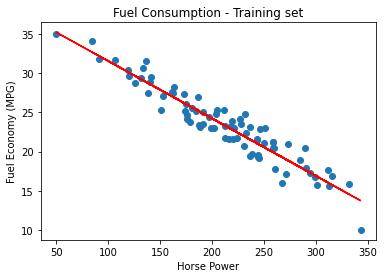

In [57]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),color='red')
plt.xlabel('Horse Power')
plt.ylabel('Fuel Economy (MPG)')
plt.title("Fuel Consumption - Training set")

Text(0.5, 1.0, 'Fuel Consumption - Testing set')

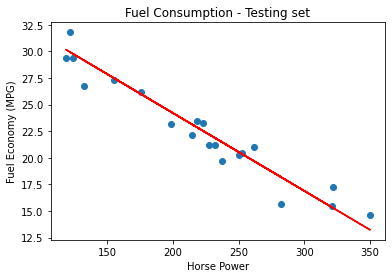

In [42]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),color='red')
plt.xlabel('Horse Power')
plt.ylabel('Fuel Economy (MPG)')
plt.title("Fuel Consumption - Testing set")

In [44]:
T = [[1000]]
FuelConsumption = regressor.predict(T)
FuelConsumption

array([[-34.42324247]])

In [45]:
T1 = np.array([[750], [250], [275], [300], [230]])
FuelConsumption1 = regressor.predict(T1)
FuelConsumption1

array([[-16.09811708],
       [ 20.55213369],
       [ 18.71962116],
       [ 16.88710862],
       [ 22.01814373]])